## Импортируем библиотеки

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn import datasets


import warnings
warnings.filterwarnings('ignore')


## Загружаем данные

In [84]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
# X = X.drop(columns=['sepal length (cm)', 'sepal width (cm)'], axis=1)

In [85]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Разведочный анализ данных

In [86]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Визуализация данных


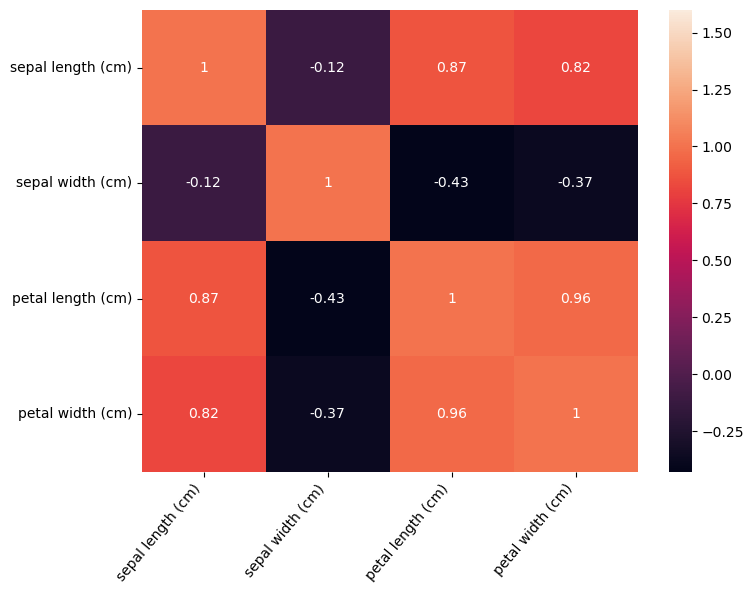

In [88]:
plt.figure(figsize = (8,6))
sns.heatmap(X.corr(),cmap = sns.color_palette("rocket", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');
plt.show()


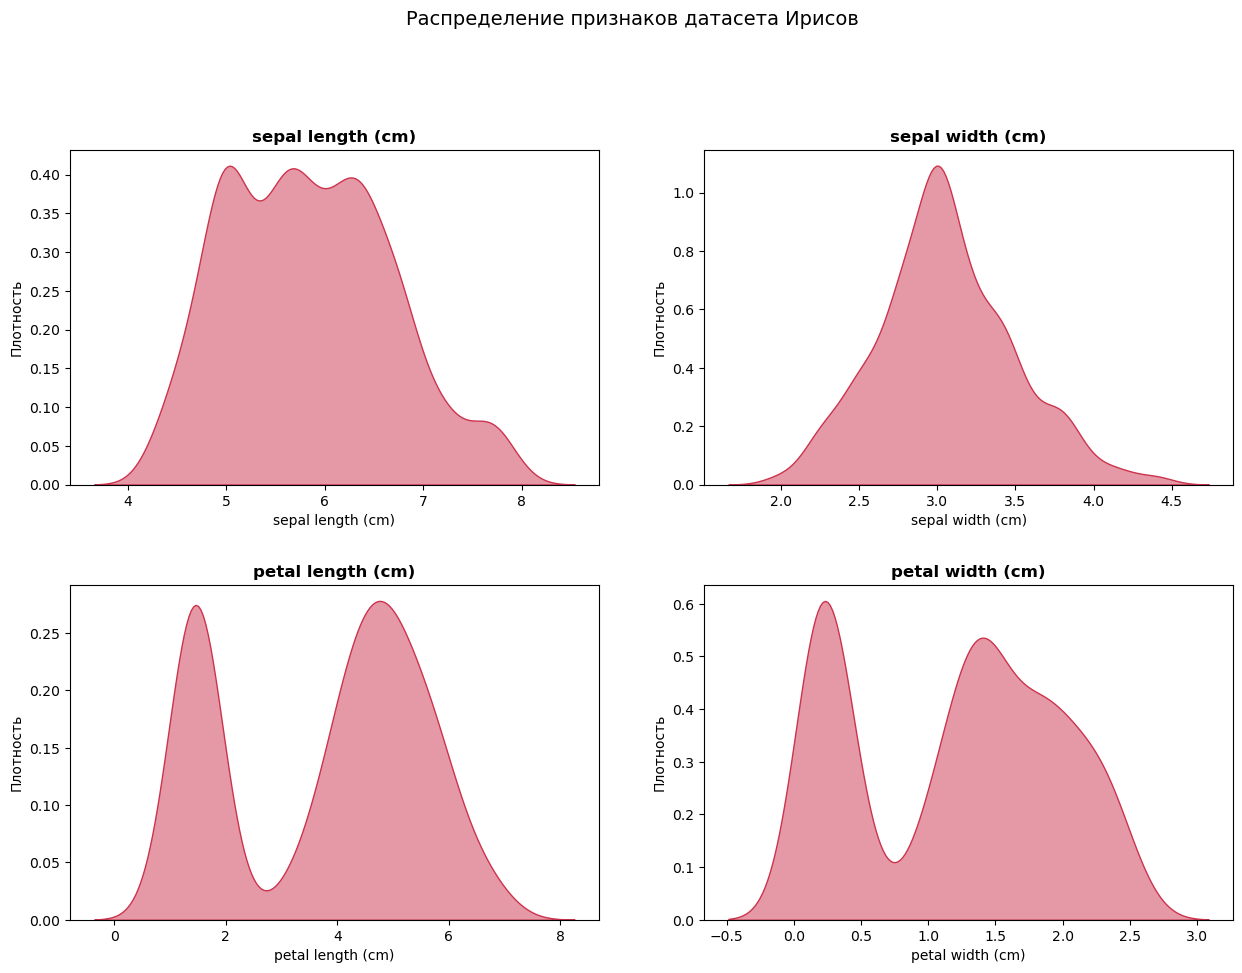

In [89]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Изменено на матрицу 2x2

# Расстояние между графиками
plt.subplots_adjust(hspace=0.3)

# Список значений признаков для цикла
columns = X.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]  # Правильное индексирование для матрицы 2x2
    sns.kdeplot(data=X,
                x=column,
                fill=True,
                alpha=0.5,
                bw_adjust=.7,
                color=[0.8, 0.2, 0.3],
                ax=ax)
    
    ax.set_title(column, fontweight='bold', fontsize=12)
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Плотность', fontsize=10)

plt.suptitle('Распределение признаков датасета Ирисов', fontsize=14, y=1.02)
plt.show()

## Нормализация данных

In [90]:
mms = MinMaxScaler()
X=pd.DataFrame(mms.fit_transform(X), columns=X.columns)

In [91]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


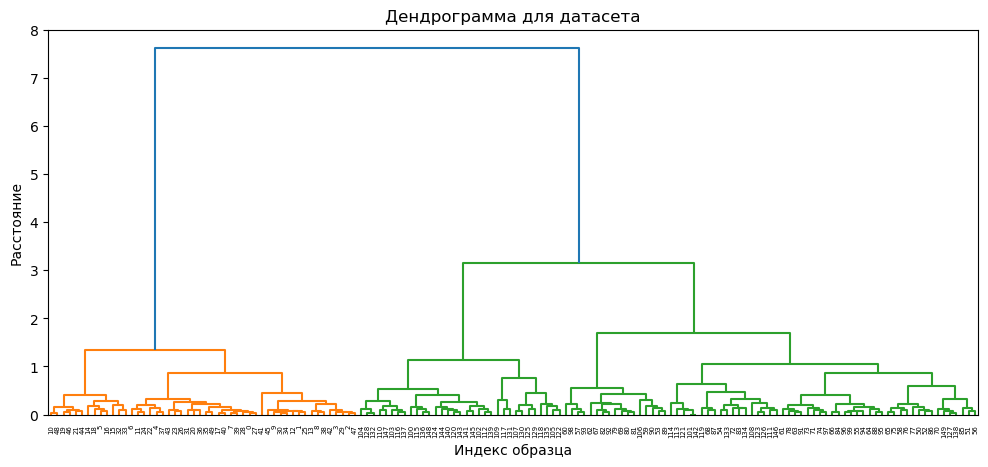

In [92]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))


plt.title('Дендрограмма для датасета')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()


## Метод главных компонент

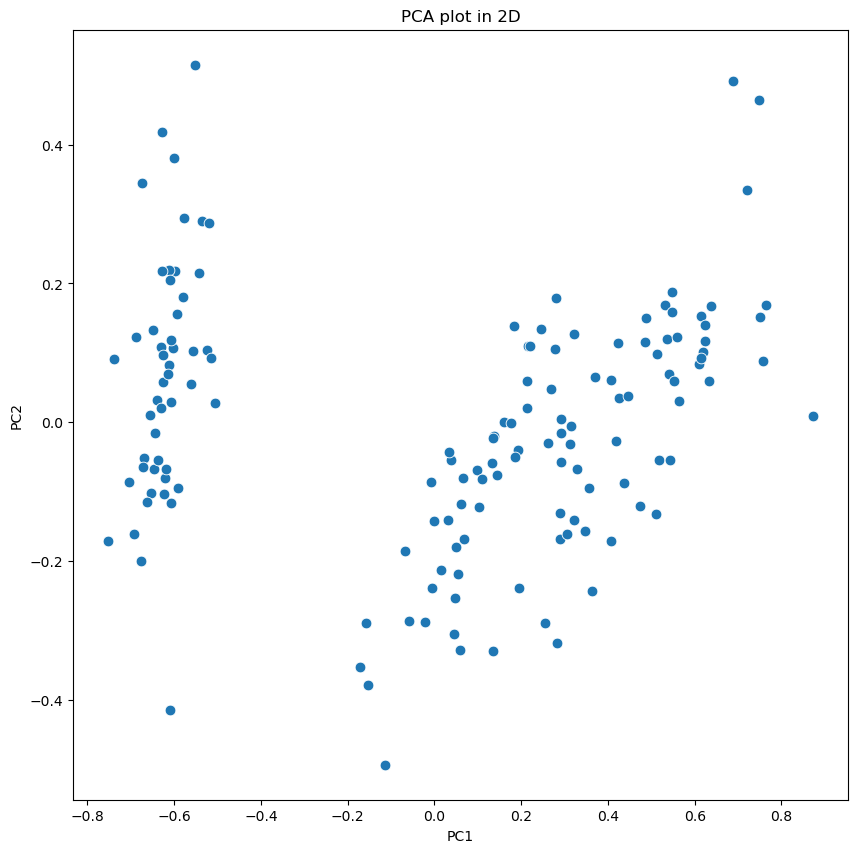

In [93]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [94]:
def TSNEplot(pred=None):    
    tsne = TSNE(random_state=1)

    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 10))
    plt.scatter(X_tsne[:, 0], 
                X_tsne[:, 1], 
                c = pred, 
                edgecolor="none", 
                alpha=0.7, s=40,
                cmap=plt.cm.get_cmap("flare", 3))

    plt.colorbar()
    plt.title("t-SNE проекция датасета ирисов");

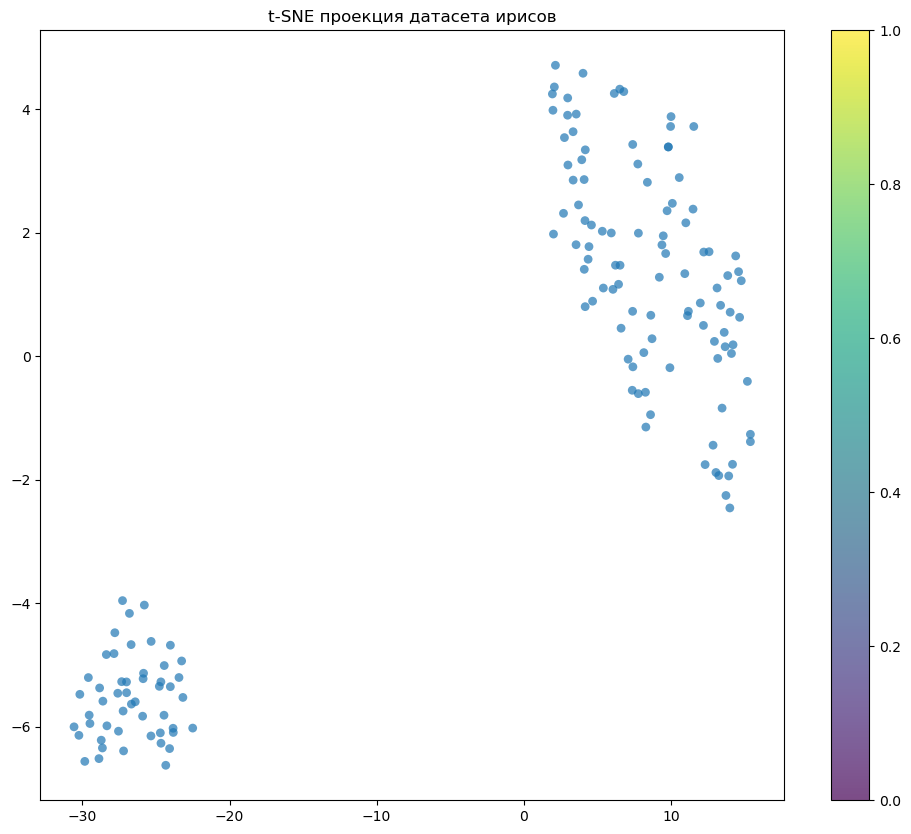

In [95]:

TSNEplot()

In [96]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

In [97]:

PCAplot3D(X, y)

## K-Means


In [98]:
pca = PCA(n_components=2)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

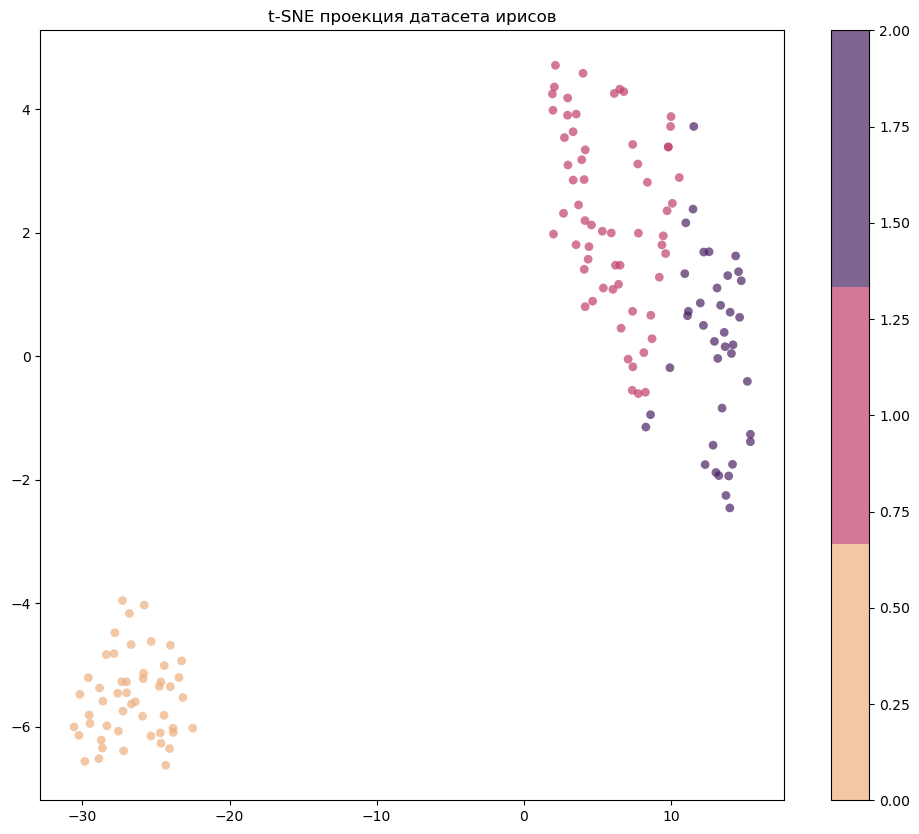

In [99]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

TSNEplot(y_kmeans)

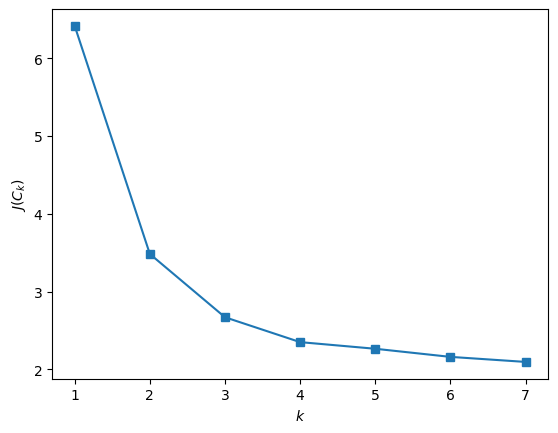

In [100]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

In [101]:
pca = PCA(n_components=2)


kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

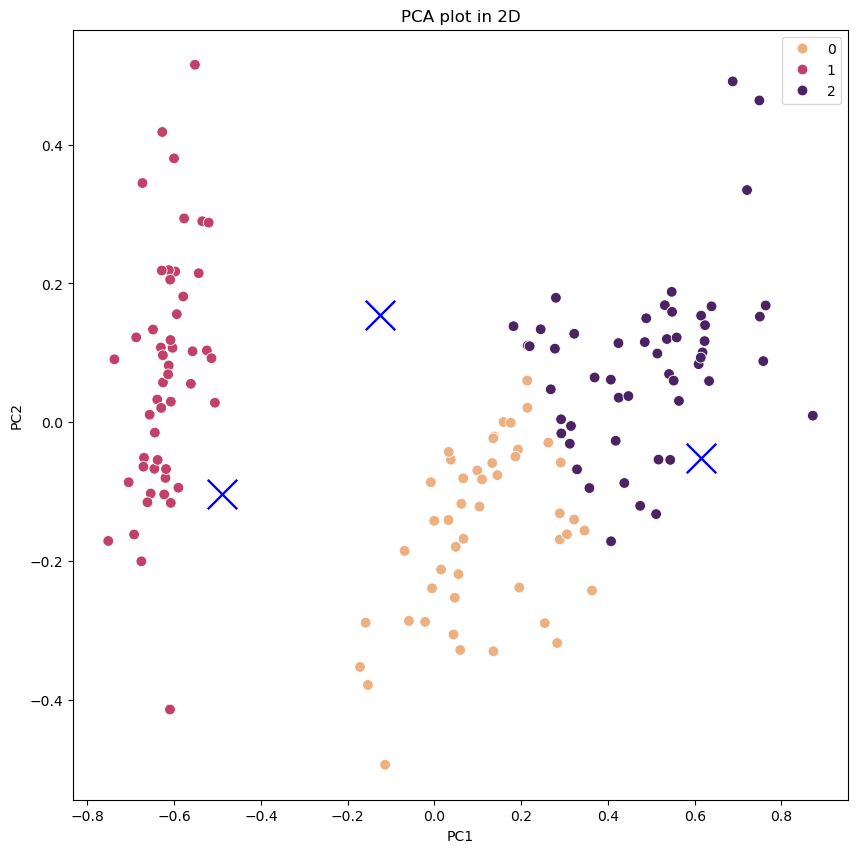

In [102]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

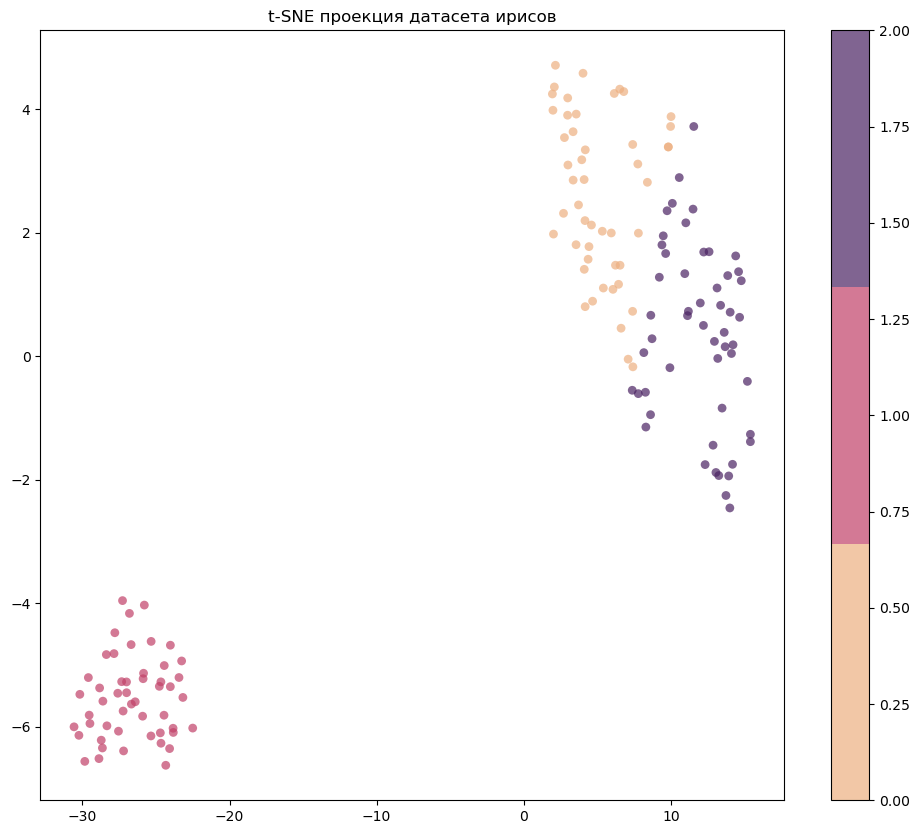

In [103]:
TSNEplot(pred_k)

In [104]:
PCAplot3D(X, pred_k)

## Сравнение реальных и предсказанных кластеров

In [105]:
import pandas as pd
import numpy as np

# Уменьшаем размер выборки
sample_size = 150
X_sampled = X.sample(n=sample_size, random_state=42)

# K-means кластеризация
kmeans_sampled = KMeans(n_clusters=3, random_state=42)
pred_k_sampled = kmeans_sampled.fit_predict(X_sampled)

# Иерархическая кластеризация (метод Ward)
ward_sampled = AgglomerativeClustering(n_clusters=3)
pred_ward_sampled = ward_sampled.fit_predict(X_sampled)

# Спектральная кластеризация
sp_sampled = SpectralClustering(n_clusters=3, random_state=42)
pred_sp_sampled = sp_sampled.fit_predict(X_sampled)

# Оценка качества кластеризации
y_sampled = y[X_sampled.index]
rs_k_sampled = rand_score(kmeans_sampled.labels_, y_sampled)
rs_ward_sampled = rand_score(pred_ward_sampled, y_sampled)
rs_sp_sampled = rand_score(pred_sp_sampled, y_sampled)

print('\nРезультаты:')
print('\nK-Means')
print('_'*45 + '\n')
print(f" rand_score = {rs_k_sampled} \n\n {rs_k_sampled * sample_size} из {sample_size} предсказано верно \n\n\n\n")

print('Agglomerative Clustering')
print('_'*45 + '\n')
print(f" rand_score = {rs_ward_sampled} \n\n {rs_ward_sampled * sample_size} из {sample_size} предсказано верно \n\n\n\n")

print('Spectral Clustering')
print('_'*45 + '\n')
print(f" rand_score = {rs_sp_sampled} \n\n {rs_sp_sampled * sample_size} из {sample_size} предсказано верно \n")



Результаты:

K-Means
_____________________________________________

 rand_score = 0.8737360178970918 

 131.06040268456377 из 150 предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.8737360178970918 

 131.06040268456377 из 150 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.8314988814317673 

 124.7248322147651 из 150 предсказано верно 



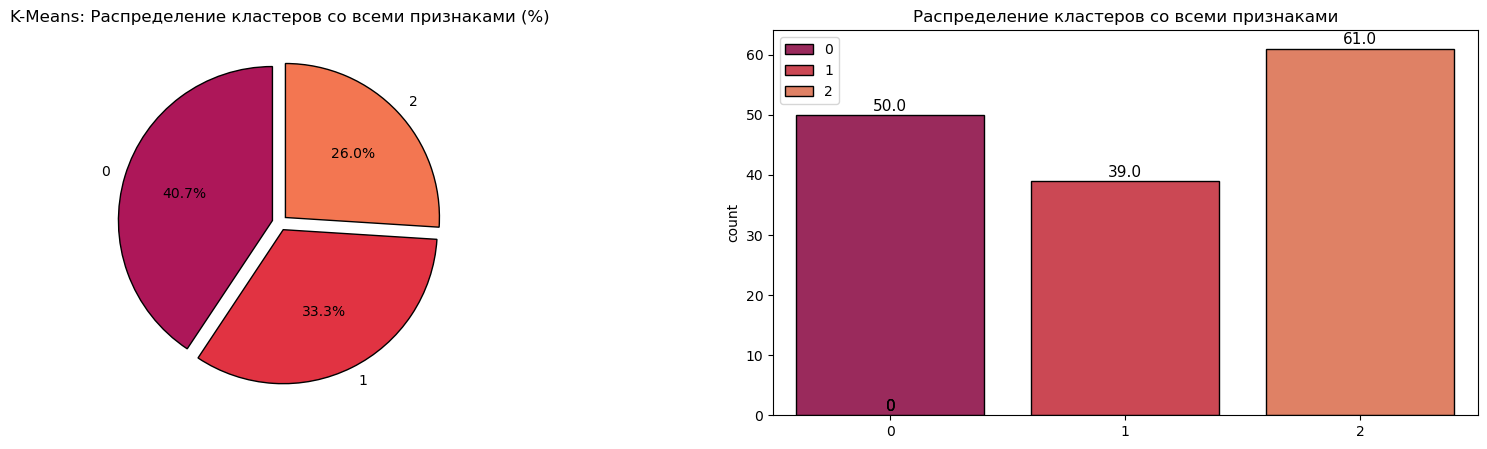

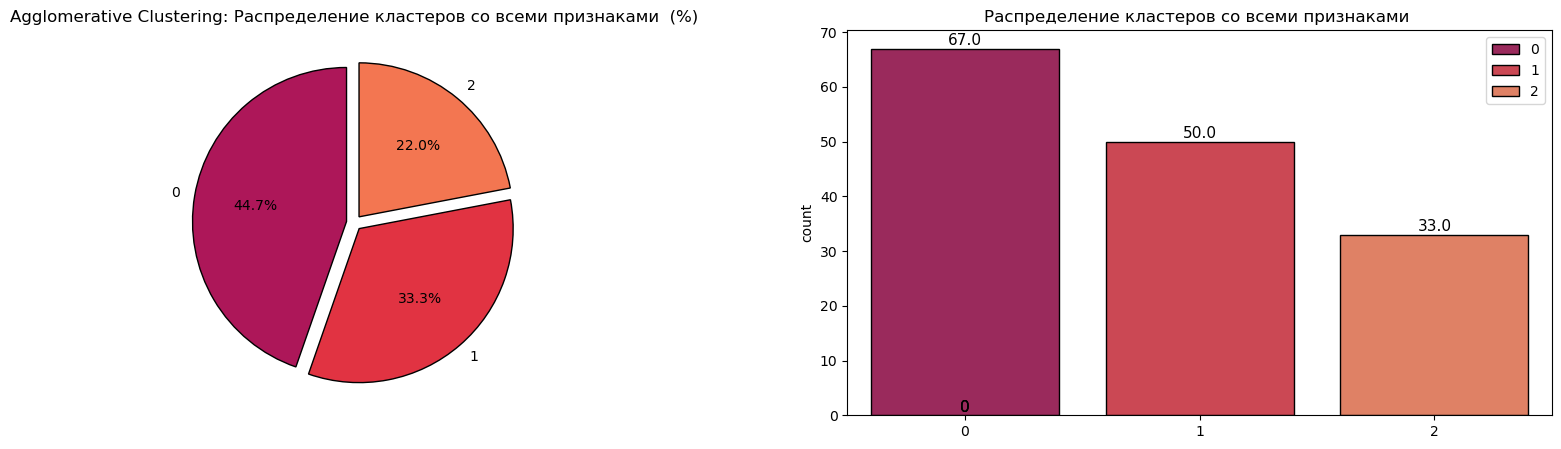

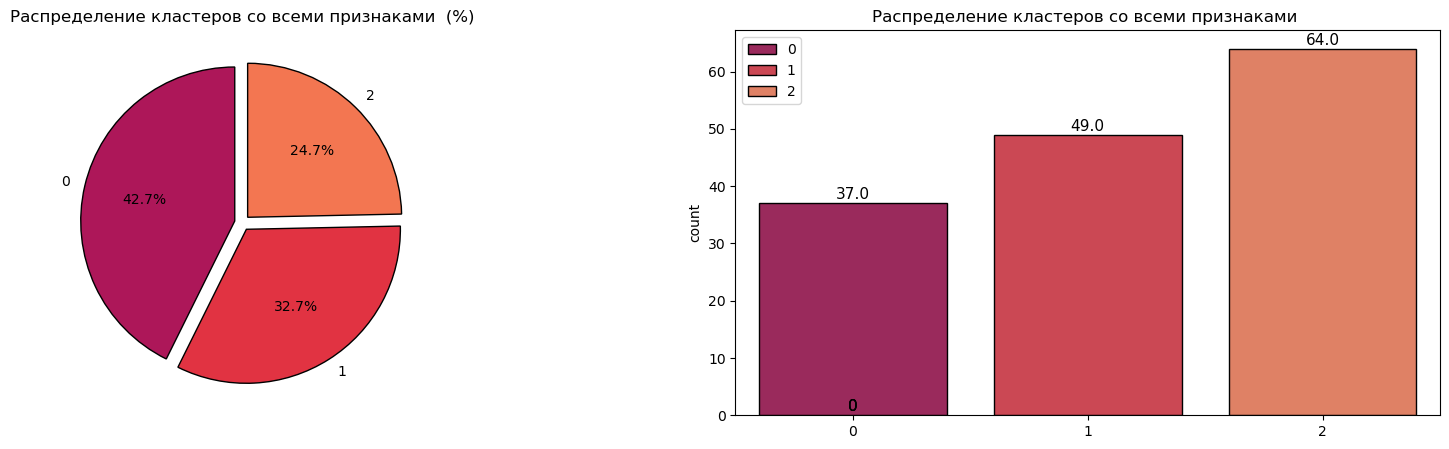

In [106]:
# K-Means
l = list(pd.Series(pred_k_sampled).value_counts())
sumLenn = sum(l)
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['0', '1', '2'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})
plt.title('K-Means: Распределение кластеров со всеми признаками (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = pred_k_sampled,
                   hue = pred_k_sampled,
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение кластеров со всеми признаками');


# Agglomerative Clustering
l = list(pd.Series(pred_ward_sampled).value_counts())
sumLenn = sum(l)
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['0', '1', '2'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})
plt.title('Agglomerative Clustering: Распределение кластеров со всеми признаками  (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = pred_ward_sampled,
                   hue = pred_ward_sampled,
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение кластеров со всеми признаками ');


# Spectral Clustering
l = list(pd.Series(pred_sp_sampled).value_counts())
sumLenn = sum(l)
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['0', '1', '2'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})

plt.title('Spectral Clustering: Spectral Clustering')
plt.title('Распределение кластеров со всеми признаками  (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = pred_sp_sampled,
                   hue = pred_sp_sampled,
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение кластеров со всеми признаками ');

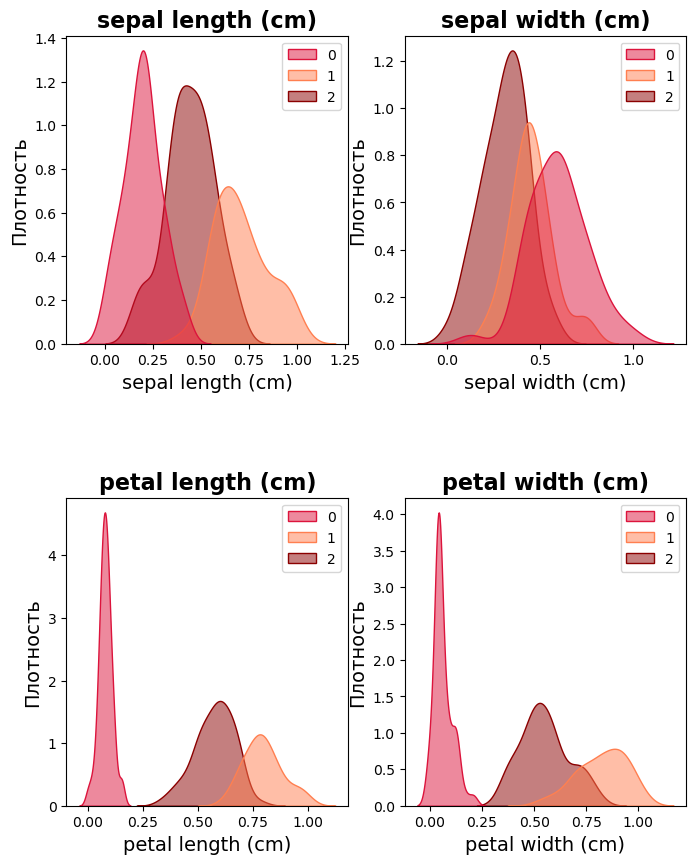

In [107]:
fig, axes = plt.subplots(2,2, figsize = (8,10))
plt.subplots_adjust(hspace=0.5)
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = X_sampled,
                palette = ['#DC143C','#FF7F50','#8B0000'],
                x = column,
                fill = True,
                alpha = 0.5,
                hue = pred_k_sampled,
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

Видно, что для эффективного разделения первый и второй кластеры сильнее зависят от параметров petal length и petal width, а кластер 0 выделяется как отдельная группа по всем признакам.
Наименее выраженное разделение наблюдается в параметре sepal width.

Уберем первые два признака, и еще раз обучить модели.

In [108]:
import pandas as pd
import numpy as np

# Уменьшаем размер выборки
X = X.drop(columns=['sepal length (cm)','sepal width (cm)'], axis=1)
sample_size = 150
X_sampled = X.sample(n=sample_size, random_state=42)

# K-means кластеризация
kmeans_sampled = KMeans(n_clusters=3, random_state=42)
pred_k_sampled = kmeans_sampled.fit_predict(X_sampled)

# Иерархическая кластеризация (метод Ward)
ward_sampled = AgglomerativeClustering(n_clusters=3)
pred_ward_sampled = ward_sampled.fit_predict(X_sampled)

# Спектральная кластеризация
sp_sampled = SpectralClustering(n_clusters=3, random_state=42)
pred_sp_sampled = sp_sampled.fit_predict(X_sampled)

# Оценка качества кластеризации
y_sampled = y[X_sampled.index]
rs_k_sampled = rand_score(kmeans_sampled.labels_, y_sampled)
rs_ward_sampled = rand_score(pred_ward_sampled, y_sampled)
rs_sp_sampled = rand_score(pred_sp_sampled, y_sampled)

print('\nРезультаты:')
print('\nK-Means')
print('_'*45 + '\n')
print(f" rand_score = {rs_k_sampled} \n\n {rs_k_sampled * sample_size} из {sample_size} предсказано верно \n\n\n\n")

print('Agglomerative Clustering')
print('_'*45 + '\n')
print(f" rand_score = {rs_ward_sampled} \n\n {rs_ward_sampled * sample_size} из {sample_size} предсказано верно \n\n\n\n")

print('Spectral Clustering')
print('_'*45 + '\n')
print(f" rand_score = {rs_sp_sampled} \n\n {rs_sp_sampled * sample_size} из {sample_size} предсказано верно \n")



Результаты:

K-Means
_____________________________________________

 rand_score = 0.9495302013422818 

 142.4295302013423 из 150 предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.8322147651006712 

 124.83221476510067 из 150 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.9194630872483222 

 137.91946308724832 из 150 предсказано верно 



Text(0.5, 1.0, 'Распределение кластеров без признаком [sepal length (cm), sepal width (cm)]')

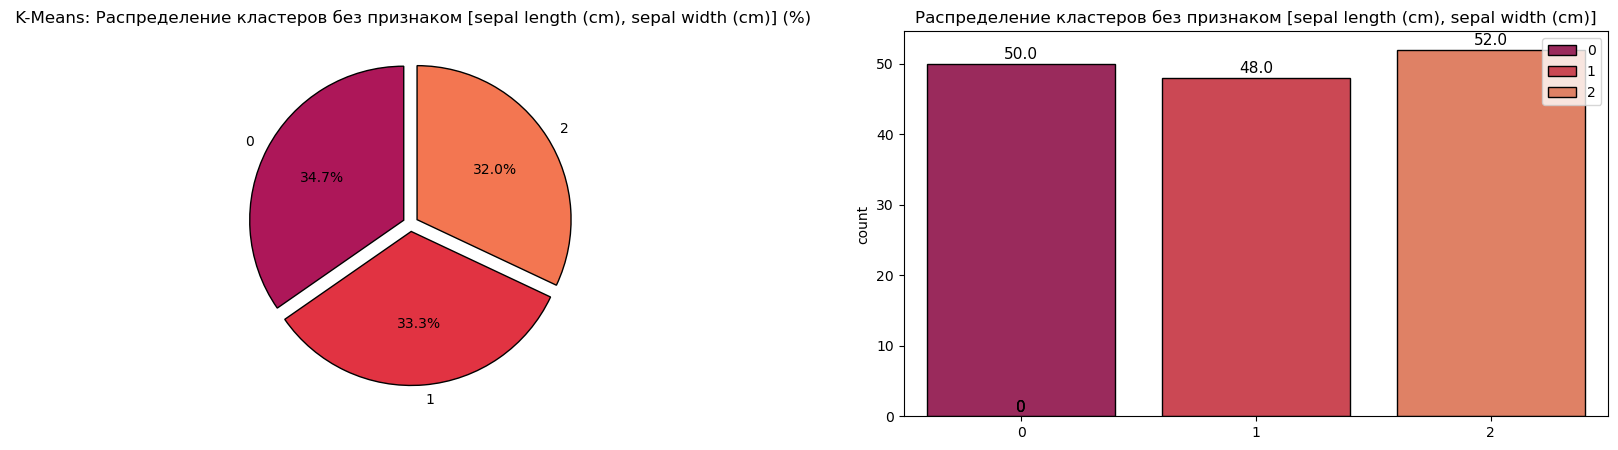

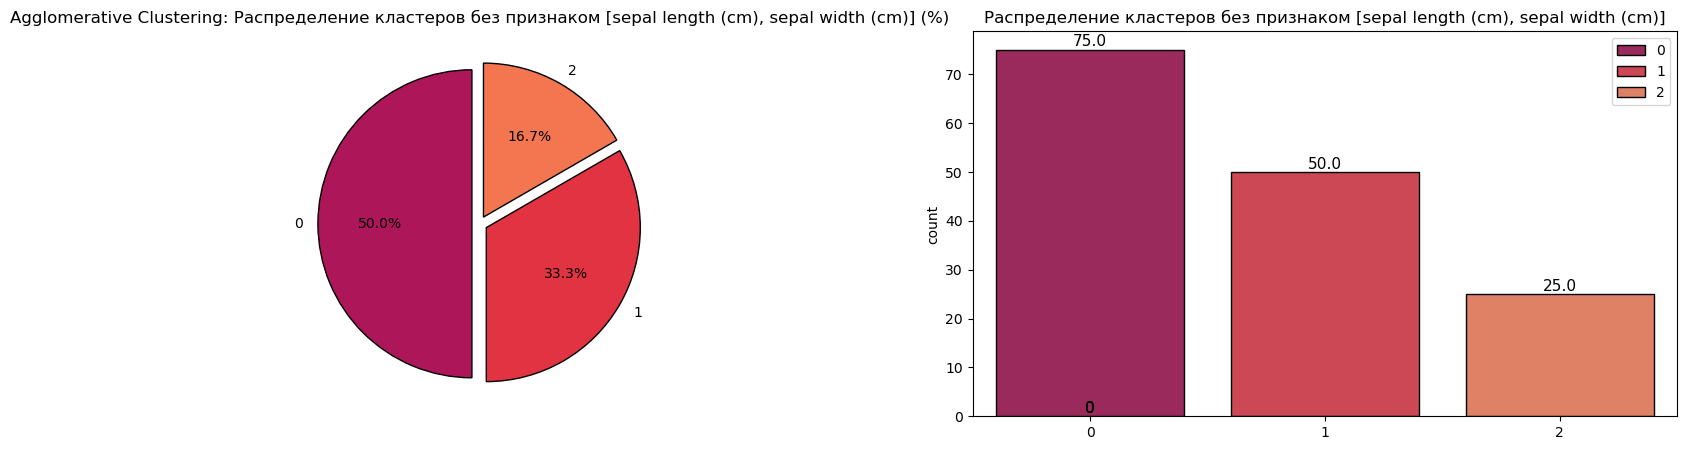

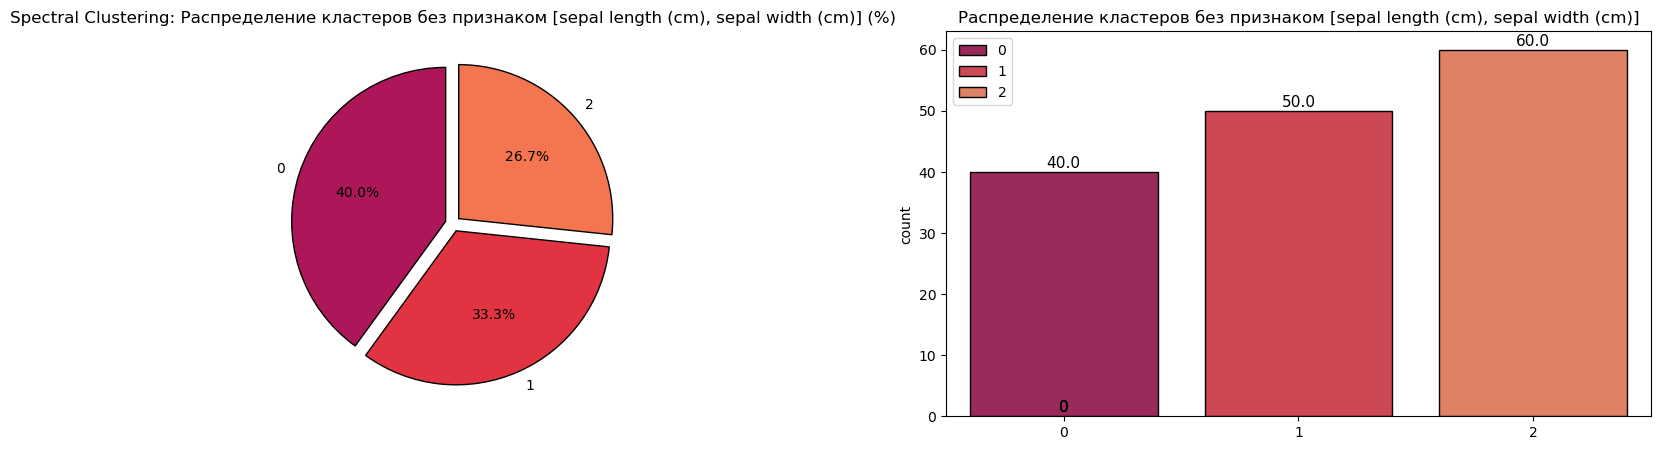

In [109]:
# K-Means
l = list(pd.Series(pred_k_sampled).value_counts())
sumLenn = sum(l)
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['0', '1', '2'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})
plt.title(' K-Means: Распределение кластеров без признаком [sepal length (cm), sepal width (cm)] (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = pred_k_sampled,
                   hue = pred_k_sampled,
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение кластеров без признаком [sepal length (cm), sepal width (cm)]')


# Agglomerative Clustering
l = list(pd.Series(pred_ward_sampled).value_counts())
sumLenn = sum(l)
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['0', '1', '2'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})
plt.title('Agglomerative Clustering: Распределение кластеров без признаком [sepal length (cm), sepal width (cm)] (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = pred_ward_sampled,
                   hue = pred_ward_sampled,
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение кластеров без признаком [sepal length (cm), sepal width (cm)]')


# Spectral Clustering
l = list(pd.Series(pred_sp_sampled).value_counts())
sumLenn = sum(l)
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['0', '1', '2'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})

plt.title('Spectral Clustering')
plt.title('Spectral Clustering: Распределение кластеров без признаком [sepal length (cm), sepal width (cm)] (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = pred_sp_sampled,
                   hue = pred_sp_sampled,
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение кластеров без признаком [sepal length (cm), sepal width (cm)]')


### Вывод
После удаления двух признаком (sepal length (cm), sepal width (cm)) были получены следующие результаты:
| Модель                     | До   | После | Изменение      |
|----------------------------|------|-------|----------------|
| **K-Means**                | 87%  | 95%   | ▲ **+8%**      |
| **Agglomerative Clustering** | 87%  | 83%   | ▼ -4%        |
| **Spectral Clustering**    | 83%  | 92%   | ▲ **+9%**      |

Наибольший показатель предсказания у модели **K-Means**, но наибольший прирост наблюдается у модели **Spectral Clustering**